In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
import pandas as pd
import datetime as dt

In [6]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
def csvToDataframe(FILE_NAME='fire_county_data.csv', STATIC_FOLDER=''):
    """ RETURNS PANDAS DATAFRAME, REQUIRES FILENAME WITH .CSV EXTENSION 
    ALSO STATIC_FOLDER IF ANY DEFAULT NONE """
    BASE_DIR = os.getcwd()
    PATH_COMPILED = os.path.join(BASE_DIR, STATIC_FOLDER, FILE_NAME)
    _df = pd.read_csv(PATH_COMPILED, encoding="iso-8859-1", low_memory=False)
    return _df

In [23]:
csvToDataframe()

,Incident Number,Property Code,Property Use Description,Property Use Category,Incident Code,Primary Type Category,Sub Type Category,Aid Given or Received,Incident Date and Time,First Unit Dispatched,...,Total First Unit Response Time,Total Time Committed,shift,Incident Location Area,Number of Apparatus Assigned,Number of Personnel Assigned,Property Value,Property Lost,Contents Value,Contents Lost
0,16-0000001,963,Street or road in commercial area.,Outside,324,Hazard,MVA,None,1/1/2016 1:17,1/1/2016 1:16,...,0:03:50,0:12:16,B,8,2,8,$-,$-,$-,$-
1,16-0000002,419,1- or 2-family dwelling.,Residential,321,Medical,EMS,None,1/1/2016 1:34,1/1/2016 1:33,...,0:06:38,0:32:14,B,4,1,5,$-,$-,$-,$-
2,16-0000003,142,Clubhouse associated with country club.,Assembly,710,No Hazard,ALARM,None,1/1/2016 2:28,1/1/2016 2:27,...,0:08:39,0:17:12,B,8,2,8,$-,$-,$-,$-
3,16-0000004,449,"Hotel/Motel, commercial.",Residential,510,No Hazard,ASSIST,Automatic Aid Received,1/1/2016 2:39,1/1/2016 2:38,...,0:09:52,0:31:58,B,1,1,4,$-,$-,$-,$-
4,16-0000005,599,Business office.,Business,321,Medical,EMS,None,1/1/2016 2:58,1/1/2016 2:58,...,0:03:34,0:24:47,B,1,1,3,$-,$-,$-,$-
5,16-0000006,419,1- or 2-family dwelling.,Residential,510,No Hazard,ASSIST,None,1/1/2016 3:38,1/1/2016 3:38,...,0:04:29,0:15:03,B,8,1,4,$-,$-,$-,$-
6,16-0000007,429,Multifamily dwelling.,Residential,321,Medical,EMS,None,1/1/2016 6:09,1/1/2016 6:09,...,0:05:16,0:20:09,B,3,1,5,$-,$-,$-,$-
7,16-0000008,700,"Manufacturing, processing.",Manufacturing,741,No Hazard,ALARM,None,1/1/2016 7:46,1/1/2016 7:44,...,0:06:57,0:11:18,C,1,2,8,$-,$-,$-,$-
8,16-0000009,700,"Manufacturing, processing.",Manufacturing,740,No Hazard,ALARM,None,1/1/2016 8:03,1/1/2016 8:02,...,0:06:41,0:23:51,C,1,2,8,$-,$-,$-,$-
9,16-0000010,419,1- or 2-family dwelling.,Residential,321,Medical,EMS,None,1/1/2016 8:43,1/1/2016 8:42,...,0:04:37,0:21:49,C,4,1,5,$-,$-,$-,$-


In [9]:
def describeFireData(DESC_FILE_NAME = 'fire_data_description.csv'):
    desc_fire_df = csvToDataframe(DESC_FILE_NAME)
    dict_keys = desc_fire_df['Column Heading']
    dict_values = desc_fire_df['Value Description']
    _dict = dict(zip(dict_keys, dict_values))
    print(_dict)
    return _dict

In [22]:
describeFireData()

{'Incident Number': 'Unique incident identification number', 'Property Code': 'Code used to identify the type of property where the incident occurred', 'Property Use Description': 'The description associated with the property code', 'Property Use Category': 'The category associated with the property code', 'Incident Code': 'The code used to identify the incident type', 'Primary Type Category': 'The primary category of the incident type from incident code', 'Sub Type Category': 'A secondary descripter of the incident type from incident code', 'Aid Given or Received': 'Information on whether outside agencies assisted or received assistance for the incident', 'Incident Date and Time': 'The date and time stamp assigned to the incident', 'First Unit Dispatched': 'The date and time the first unit was assigned or dispatched to the incident', 'First Unit Arrived': 'The date and time the first unit arrived at the incident', 'All Units Clear': 'The date and time the last unit cleared the inciden

{'Incident Number': 'Unique incident identification number',
 'Property Code': 'Code used to identify the type of property where the incident occurred',
 'Property Use Description': 'The description associated with the property code',
 'Property Use Category': 'The category associated with the property code',
 'Incident Code': 'The code used to identify the incident type',
 'Primary Type Category': 'The primary category of the incident type from incident code',
 'Sub Type Category': 'A secondary descripter of the incident type from incident code',
 'Aid Given or Received': 'Information on whether outside agencies assisted or received assistance for the incident',
 'Incident Date and Time': 'The date and time stamp assigned to the incident',
 'First Unit Dispatched': 'The date and time the first unit was assigned or dispatched to the incident',
 'First Unit Arrived': 'The date and time the first unit arrived at the incident',
 'All Units Clear': 'The date and time the last unit cleared 

In [11]:
def ctgryResptimeDataFramer(FIRE_DATA_FILENAME = 'fire_county_data.csv'):
    fire_df = csvToDataframe(FIRE_DATA_FILENAME)
    responseTime_df = fire_df[[
        'Property Use Category',
        'Total First Unit Response Time'
    ]].dropna()
    responseTime_df['responseTime'] = responseTime_df['Total First Unit Response Time']
    responseTime_df.drop(columns='Total First Unit Response Time', inplace=True)

    # groupby -> mean doesnot work yet. dtype is non-numeric
    responseTime_df['responseSumSeconds'] = [ int(int(dt.datetime.strptime(response,'%H:%M:%S').hour)*3600 + int(dt.datetime.strptime(response,'%H:%M:%S').minute)*60 + int(dt.datetime.strptime(response,'%H:%M:%S').second))
        for response in responseTime_df['responseTime']
    ]
    resPrpCtgFocused_df = responseTime_df.groupby('Property Use Category').mean().__round__(0)
    resPrpCtgFocused_df['responseSumSeconds'] = [int(second) 
                                                 for second in resPrpCtgFocused_df['responseSumSeconds']
                                                ]
    resPrpCtgFocused_df.sort_values(by= ['responseSumSeconds'], ascending=False, inplace=True)
    _df = resPrpCtgFocused_df.copy()
    keys_list = [str(column) for column in list(_df.columns)]
    values_list = [_df[column] for column in keys_list]
    _dict = dict(zip(keys_list, values_list))
    print(_dict)
    return _df

In [21]:
ctgryResptimeDataFramer()

{'responseSumSeconds': Property Use Category
Other                       458
Storage                     412
Manufacturing               402
Assembly                    380
Educational                 345
Residential                 338
Outside                     302
Business                    291
Health Care or Detention    275
Industrial                  251
Name: responseSumSeconds, dtype: int64}


,responseSumSeconds
Property Use Category,
Other,458
Storage,412
Manufacturing,402
Assembly,380
Educational,345
Residential,338
Outside,302
Business,291
Health Care or Detention,275


In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [41]:
def responsetimeCategory():
    
    def csvToDataframe(FILE_NAME='fire_county_data.csv', STATIC_FOLDER=''):
        """ RETURNS PANDAS DATAFRAME, REQUIRES FILENAME WITH .CSV EXTENSION 
        ALSO STATIC_FOLDER IF ANY DEFAULT NONE """
        BASE_DIR = os.getcwd()
        PATH_COMPILED = os.path.join(BASE_DIR, STATIC_FOLDER, FILE_NAME)
        _df = pd.read_csv(PATH_COMPILED, encoding="iso-8859-1", low_memory=False)
        return _df

#     csvToDataframe()

    def describeFireData(DESC_FILE_NAME = 'fire_data_description.csv'):
        desc_fire_df = csvToDataframe(DESC_FILE_NAME)
        dict_keys = desc_fire_df['Column Heading']
        dict_values = desc_fire_df['Value Description']
        _dict = dict(zip(dict_keys, dict_values))
        print(_dict)
        return _dict

    describeFireData()

    def ctgryResptimeDataFramer(FIRE_DATA_FILENAME = 'fire_county_data.csv'):
        fire_df = csvToDataframe(FIRE_DATA_FILENAME)
        responseTime_df = fire_df[[
            'Property Use Category',
            'Total First Unit Response Time'
        ]].dropna()
        responseTime_df['responseTime'] = responseTime_df['Total First Unit Response Time']
        responseTime_df.drop(columns='Total First Unit Response Time', inplace=True)

        # groupby -> mean doesnot work yet. dtype is non-numeric
        responseTime_df['responseSumSeconds'] = [ int(int(dt.datetime.strptime(response,'%H:%M:%S').hour)*3600 + int(dt.datetime.strptime(response,'%H:%M:%S').minute)*60 + int(dt.datetime.strptime(response,'%H:%M:%S').second))
            for response in responseTime_df['responseTime']
        ]
        resPrpCtgFocused_df = responseTime_df.groupby('Property Use Category').mean().__round__(0)
        resPrpCtgFocused_df['responseSumSeconds'] = [int(second) 
                                                     for second in resPrpCtgFocused_df['responseSumSeconds']
                                                    ]
        resPrpCtgFocused_df.sort_values(by= ['responseSumSeconds'], ascending=False, inplace=True)
        resPrpCtgFocused_df=resPrpCtgFocused_df.T
        _df = resPrpCtgFocused_df.copy()
        keys_list = [str(column) for column in list(_df.columns)]
        values_list = [_df[column] for column in keys_list]
        for key, value in zip(keys_list, values_list):
            print(key + ' ' + str(value))
        return _df

    ctgryResptimeDataFramer()

    def barCategoryRespTimer(_df = ctgryResptimeDataFramer()):
        _list = list(_df.columns)
        plt.style.use(style='fivethirtyeight')
        plt.figure(figsize=(8,6))
        plt.grid(True)
        plt.title("Response Time vs Property Use Category")
        plt.xlabel('Response Time In Seconds')
        plt.rcParams['font.size'] = 14
    # parameter: create an axis with all around average
        for category in _list:
            plt.barh(category[:12], _df[category],alpha = 0.75, align='center', label=category)
    #     plt.legend(loc='best')
        plt.show()
        return None
    
    barCategoryRespTimer()
    
    return None

{'Incident Number': 'Unique incident identification number', 'Property Code': 'Code used to identify the type of property where the incident occurred', 'Property Use Description': 'The description associated with the property code', 'Property Use Category': 'The category associated with the property code', 'Incident Code': 'The code used to identify the incident type', 'Primary Type Category': 'The primary category of the incident type from incident code', 'Sub Type Category': 'A secondary descripter of the incident type from incident code', 'Aid Given or Received': 'Information on whether outside agencies assisted or received assistance for the incident', 'Incident Date and Time': 'The date and time stamp assigned to the incident', 'First Unit Dispatched': 'The date and time the first unit was assigned or dispatched to the incident', 'First Unit Arrived': 'The date and time the first unit arrived at the incident', 'All Units Clear': 'The date and time the last unit cleared the inciden

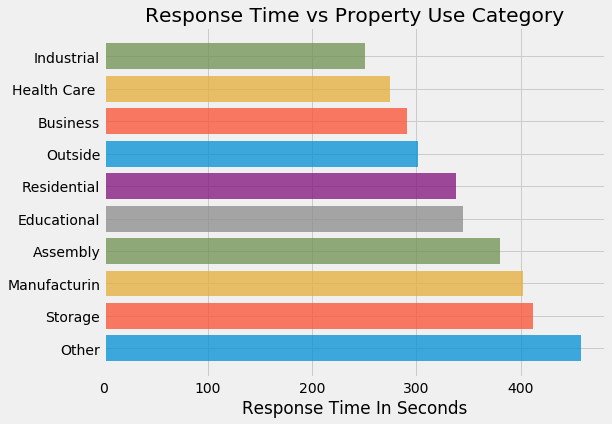

In [42]:
responsetimeCategory()